## 1. Setup and Imports

In [ ]:
import sys
import os

# Add the src directory to the path so we can import malthusjax
sys.path.append('/Users/leonardodicaterina/Documents/GitHub/MalthusJAX/src')

import jax
import jax.numpy as jnp
import jax.random as jar
import matplotlib.pyplot as plt

from malthusjax.core.genome import BinaryGenome
from malthusjax.core.fitness.binary_ones import BinarySumFitnessEvaluator
from malthusjax.core.population.population import AbstractPopulation
from malthusjax.operators.mutation.binary import BitFlipMutation, ScrambleMutation

## 2. BitFlipMutation: Introducing Genetic Variation
The BitFlipMutation operator randomly flips bits (0 to 1, or 1 to 0) in a binary genome with a specified probability. This introduces new genetic material into the population, preventing premature convergence.

#### Initialization
You can initialize BitFlipMutation with a default mutation rate (0.01) or a custom rate

In [2]:
# Default initialization
mutation_default = BitFlipMutation()
print(f"Default Mutation Rate: {mutation_default.mutation_rate}") 

# Custom initialization
custom_mutation_rate = 0.5
mutation_instance = BitFlipMutation(mutation_rate=custom_mutation_rate)
print(f"Custom Mutation Rate: {mutation_instance.mutation_rate}")

pop_size = 5
genome_init_params = {'array_size': 10, 'p': 0.5}
population = AbstractPopulation(
    genome_cls=BinaryGenome,
    pop_size=pop_size,
    random_init=True,
    random_key=jar.PRNGKey(10),
    genome_init_params=genome_init_params,
)
#initial_population_stack = population.to_stack()
mutated_population = mutation_instance(population, jar.PRNGKey(20))

Default Mutation Rate: 0.01
Custom Mutation Rate: 0.5


Text(0, 0.5, 'Individual Index')

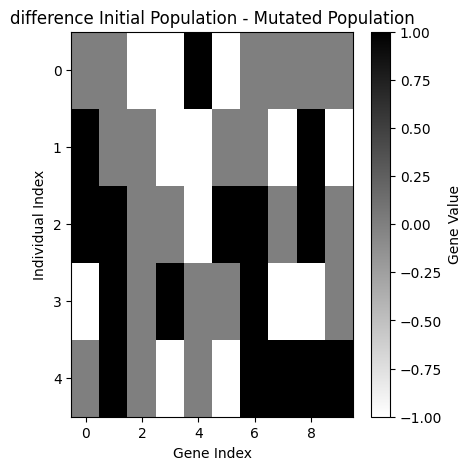

In [3]:
initial_population_stack = population.to_stack().astype(jnp.int32)
mutated_population_stack = mutated_population.to_stack().astype(jnp.int32)

#heatmap of initial population - mutation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("difference Initial Population - Mutated Population")
plt.imshow(initial_population_stack - mutated_population_stack, cmap='binary', aspect='auto')
plt.colorbar(label='Gene Value')
plt.xlabel('Gene Index')
plt.ylabel('Individual Index')  

In [ ]:
single_mutation_fn = mutation_instance.get_compiled_function()
single_genome = BinaryGenome(**genome_init_params, random_init= True)

first_mutation = single_mutation_fn(single_genome.to_tensor(), 
                                    jar.split(jar.PRNGKey(42),
                                              genome_init_params.get('array_size')))

In [18]:
single_genome.to_tensor()-first_mutation

Array([ 0,  0,  0,  1,  0,  1,  1,  0,  0, -1], dtype=int32)

In [ ]:
# testing batched finction
batched_mutation_fn = mutation_instance.get_batched_function()
population = AbstractPopulation(
    genome_cls=BinaryGenome,
    genome_init_params=genome_init_params,
    pop_size=10,
    random_key=jar.PRNGKey(42),
    random_init=True )


mutated_population = batched_mutation_fn(
    population.to_stack(),
    jar.split(
        jar.PRNGKey(42),
        len(population)
    )
)


Text(0, 0.5, 'Individual Index')

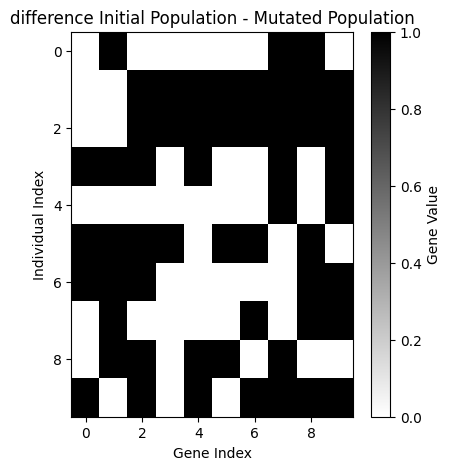

In [25]:
initial_population_stack = population.to_stack().astype(jnp.int32)
mutated_population_stack = mutated_population.astype(jnp.int32)

#heatmap of initial population - mutation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("difference Initial Population - Mutated Population")
plt.imshow(initial_population_stack - mutated_population_stack, cmap='binary', aspect='auto')
plt.colorbar(label='Gene Value')
plt.xlabel('Gene Index')
plt.ylabel('Individual Index') 